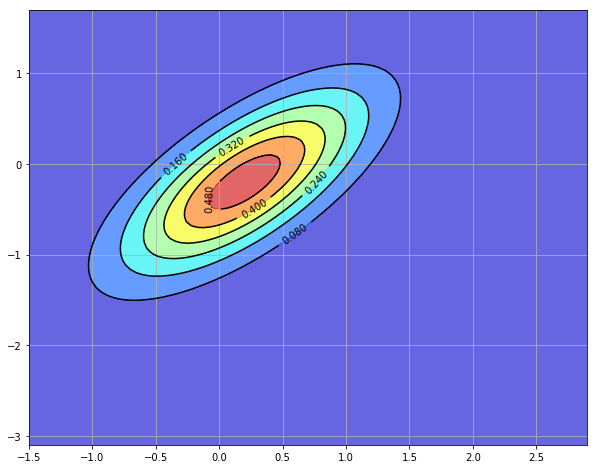

In [7]:
from scipy import linalg
import numpy as np
import matplotlib.cm as cm
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt

# == Set up the Gaussian prior density p == #
Sigma = [[0.4, 0.3], [0.3, 0.45]]
Sigma = np.matrix(Sigma)
x_hat = np.matrix([0.2, -0.2]).T
# == Define the matrices G and R from the equation y = G x + N(0, R) == #
G = [[1, 0], [0, 1]]
G = np.matrix(G)
R = 0.5 * Sigma
# == The matrices A and Q == #
A = [[1.2, 0], [0, -0.2]]
A = np.matrix(A)
Q = 0.3 * Sigma
# == The observed value of y == #
y = np.matrix([2.3, -1.9]).T

# == Set up grid for plotting == #
x_grid = np.linspace(-1.5, 2.9, 100)
y_grid = np.linspace(-3.1, 1.7, 100)
X, Y = np.meshgrid(x_grid, y_grid)

def gen_gaussian_plot_vals(mu, C):
    "Z values for plotting the bivariate Gaussian N(μ, C)"
    m_x, m_y = float(mu[0]), float(mu[1])
    s_x, s_y = np.sqrt(C[0, 0]), np.sqrt(C[1, 1])
    s_xy = C[0, 1]
    return bivariate_normal(X, Y, s_x, s_y, m_x, m_y, s_xy)

# Plot the figure

fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

Z = gen_gaussian_plot_vals(x_hat, Sigma)
ax.contourf(X, Y, Z, 6, alpha=0.6, cmap=cm.jet)
cs = ax.contour(X, Y, Z, 6, colors="black")
ax.clabel(cs, inline=1, fontsize=10)

plt.show()

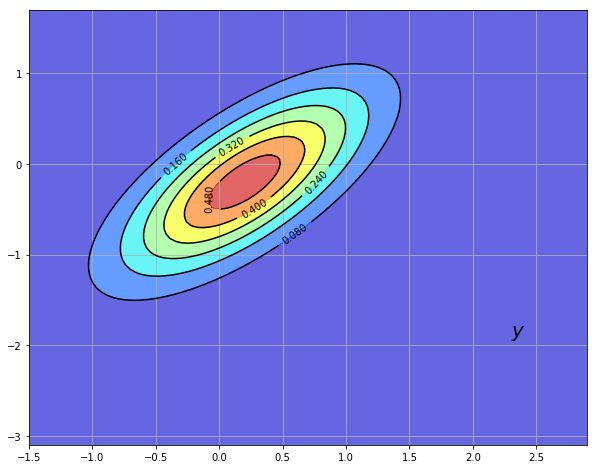

In [8]:
# Filtering Step

fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

Z = gen_gaussian_plot_vals(x_hat, Sigma)
ax.contourf(X, Y, Z, 6, alpha=0.6, cmap=cm.jet)
cs = ax.contour(X, Y, Z, 6, colors="black")
ax.clabel(cs, inline=1, fontsize=10)
ax.text(float(y[0]), float(y[1]), "$y$", fontsize=20, color="black")

plt.show()